In [217]:
from RRI import *
import matplotlib.pyplot as plt
import h5py
from datetime import datetime
import pandas as pd
import numpy as np
import math as mt
from math import sqrt
from scipy.signal import find_peaks
%matplotlib inline

In [218]:
fn_=RRI("RRI_20150401_033844_034241_lv1_12.0.0.h5")

In [219]:
time=fn_.epop_met 
am1_=fn_.m1_mV
m1_=fn_.m1_mV
m2_=fn_.m2_mV
m3_=fn_.m3_mV
m4_=fn_.m4_mV
time=fn_.epop_met
geo_lat=fn_.glat_
geo_lon=fn_.glon_
alt=fn_.alt_
freq_1=fn_.d1_freq
fs=fn_.fs_

In [220]:
from scipy.interpolate import interp1d

x=np.linspace(0,237,num=238,endpoint=True)
y=fn_.epop_met
y1=fn_.glat_
y2=fn_.glon_
y3=fn_.alt_
#f=interp1d(x,y)
f2=interp1d(x,y,kind='linear')
f3=interp1d(x,y1,kind='linear')
f4=interp1d(x,y2,kind='linear')
f5=interp1d(x,y3,kind='linear')
xnew=np.linspace(0,237,num=14810126,endpoint=True)

In [221]:
time=f2(xnew)
geo_lat=f3(xnew)
geo_lon=f4(xnew)
alt=f5(xnew)

In [222]:
time2=[]
for i in range(len(time)):
    dt_obj1 = pd.to_datetime(time[i], unit='s',origin='1968-05-24')
    time2.append(dt_obj1)
df2 = pd.DataFrame (time2, columns = ['time'])
time_1=pd.to_datetime(df2['time'],format='%Y-%m-%d %H:%M:%S.%f')

In [238]:
loc_nan=np.isnan(m1_)
m1_[loc_nan]=0

loc_nan=np.isnan(m2_)
m2_[loc_nan]=0

loc_nan=np.isnan(m3_)
m3_[loc_nan]=0

loc_nan=np.isnan(m4_)
m4_[loc_nan]=0

In [249]:
diapole_1=m1_+1j*m2_
diapole_2=m3_+1j*m4_

v1=abs(diapole_1) #amplitude of diapole 1
v2=abs(diapole_2)  #amplitude of diapole 2

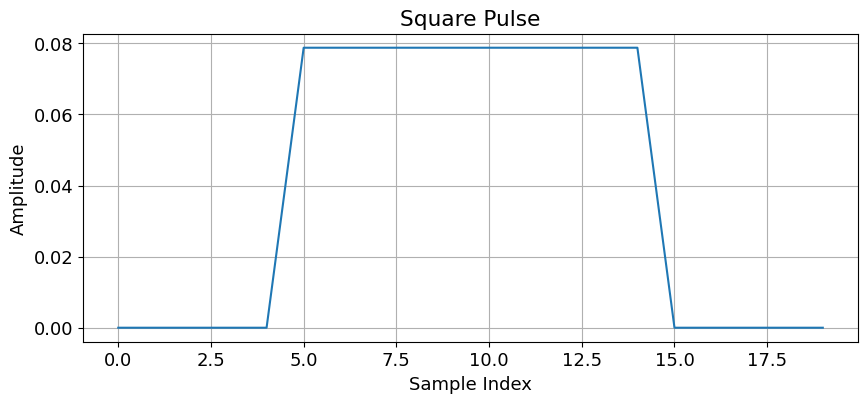

In [529]:
import numpy as np
import matplotlib.pyplot as plt

def generate_square_pulse(height, width, distance, signal_length):
    pulse = np.zeros(signal_length)
    pulse_start = 5
    while pulse_start < signal_length:
        pulse[pulse_start:pulse_start + width] = height
        pulse_start += distance + width
    return pulse

# Pulse parameters
height = np.nanquantile(np.abs(v1),0.5)      # Amplitude of the pulse
width = 10 # Width of the pulse
distance = 95     # Distance between consecutive pulses
signal_length = 20

# Generate the square pulse
pulse = generate_square_pulse(height, width, distance, signal_length)

# Plotting the square pulse
plt.figure(figsize=(10, 4))
plt.plot(pulse)
plt.title('Square Pulse')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


In [530]:
def divide_chunks(l, n):
          for i in range(0, len(l), n): 
                    yield l[i:i + n]

In [531]:
sig_n=list(divide_chunks(v1,300))


In [532]:
len(sig_n)

49368

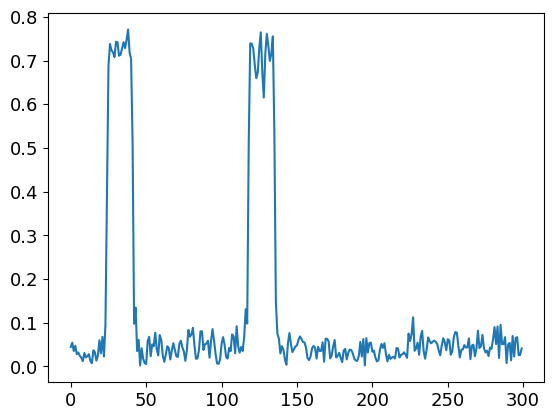

In [545]:
plt.plot(sig_n[8])

In [546]:
import numpy as np
from scipy.signal import correlate

# Generate a signal with a pulse at time t=50
cof=[]

for i in range(len(sig_n)):
          signal = sig_n[i]
          pulse = pulse
          corr = correlate(signal, pulse, mode='same')
          cof.append(corr)
          

         
          

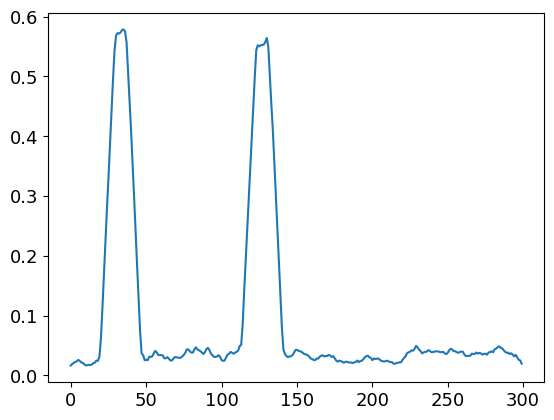

In [610]:
plt.plot(cof[8])

In [703]:
pulse_loc1=[]
pulse_loc2=[]

for i in range(len(sig_n)):
          if max(cof[i])>0.2:
                    peak_indices, _ = find_peaks(cof[i], distance=94)

                    # Sort the peak indices based on their peak values
                    sorted_peak_indices = peak_indices[np.argsort(cof[i][peak_indices])]
                    highest_peak_indices1 = sorted_peak_indices[-2:]
                    highest_peak_indices2 = sorted_peak_indices[-1:]
                    
                    ind=abs(np.diff(highest_peak_indices1))
                    if ind[0]>30:
                              for j in range(2):
                                        pulse_loc1.append(highest_peak_indices1[j]+i*300)
                                        j+=1
                    else:
                              pulse_loc2.append(highest_peak_indices2[0]+i*300)
                                        
          else:
                    i=+1
                          
                    
                    


pulse_loc = sorted(pulse_loc1+pulse_loc2) 

In [699]:
pulse_loc1=[]
pulse_loc2=[]

for i in range(len(sig_n)):
          if max(cof[i])>0.15:
                    max_indices1 = np.argsort(cof[i])[-2:]
                    max_indices2= np.argsort(cof[i])[-1:]
                    ind=abs(np.diff(max_indices1))
                    if ind[0]>30:
                              for j in range(2):
                                        pulse_loc1.append(max_indices1[j]+i*300)
                                        j+=1
                    else:
                              pulse_loc2.append(max_indices2[0]+i*300)
                              
          else:
                    i+=1         
          
          


pulse_loc = sorted(pulse_loc1+pulse_loc2)        





In [704]:
pulse_loc

[306,
 559,
 620,
 743,
 931,
 1028,
 1297,
 1404,
 2435,
 2530,
 31305,
 31453,
 32495,
 32618,
 33373,
 33555,
 33679,
 33837,
 34212,
 34471,
 35243,
 35337,
 37930,
 38083,
 39041,
 39243,
 39993,
 40181,
 40324,
 40462,
 40837,
 41034,
 41869,
 41963,
 44226,
 44368,
 45680,
 45797,
 46282,
 46430,
 46520,
 46618,
 46899,
 47006,
 47274,
 47380,
 48181,
 48295,
 48306,
 48400,
 50805,
 50992,
 52012,
 52118,
 52868,
 53056,
 53187,
 53337,
 53712,
 53928,
 54744,
 54838,
 57133,
 57242,
 58555,
 58663,
 59161,
 59305,
 59493,
 59679,
 59774,
 59935,
 60033,
 60149,
 60961,
 61187,
 61281,
 61457,
 63687,
 63795,
 64827,
 65000,
 65750,
 65938,
 66113,
 66219,
 66446,
 66594,
 67626,
 67720,
 93042,
 93295,
 93311,
 93562,
 94623,
 94756,
 95175,
 95367,
 95446,
 95555,
 95842,
 95980,
 96035,
 96212,
 97243,
 97343,
 99638,
 99749,
 100953,
 101055,
 101806,
 101993,
 102005,
 102275,
 102650,
 102880,
 103687,
 103781,
 105918,
 106185,
 107498,
 107643,
 108012,
 108243,
 108317

In [666]:
len(pulse_loc)

20758

In [667]:
x=np.array(pulse_loc)
len(x)

20758

In [668]:
pulse1=[]

for i in range(len(x)):
                 df_v1=pd.DataFrame(v1)
                 v_1=(df_v1.iloc[x[i]-30:x[i]+30]).reset_index(drop=True)
                 pulse1.append(v_1)
             

In [669]:
def from_3d_numpy_to_2d_array(X):
    array_2d = X.reshape(X.shape[0], -1)
    return array_2d

In [670]:
g=np.array(pulse1)
n1=from_3d_numpy_to_2d_array(g)
print(n1.shape)

(20758, 60)


In [671]:
noise_data=[]
for i in range(len(x)):
          v1_noise=(df_v1.iloc[x[i]+25:x[i]+45]).reset_index(drop=True)
          noise_data.append(v1_noise)

In [672]:
noise=np.array(noise_data)
n2=from_3d_numpy_to_2d_array(noise)

In [673]:
#converting 3D array into 2D array

g=np.array(pulse1)
n1=from_3d_numpy_to_2d_array(g)
print(n1.shape)

(20758, 60)


In [674]:
#finding runnig sum of data and find the position of maximum sum of set of data
ls=[]
list_new=[]
for k in range(len(n1)):
                 sub_n1=n1[k]
                 for i in range(51):
                                  j=0
                                  sublist=sub_n1[i+j:i+j+10]
                                  
                                  #sublist1=np.array(sublist1)
                                  list_new.append(sublist)

In [675]:
#splititng dataset and finding maximum sum of set of data
list_new=np.array(list_new)
arr2 = np.split(list_new, len(n1), axis=0)
extract=[]
for m in range(len(n1)):
                 nj=arr2[m]
                 sum1=np.sum(nj,axis=1)
                 sum1=np.array(sum1)
                 n0=sum1.argmax()
                 sublist3=nj[n0]
                 extract.append(sublist3)

In [676]:
newextract=[]
for h in range(len(n1)):
                 m=(extract[h]).tolist()
                 newextract.append(m)

In [677]:
pos=[]
for z in range(len(n1)):
                 indices = [i for i, x in enumerate(n1[z]) for p , y in enumerate(extract[z]) if x==y]
                 pos.append(indices)

In [678]:
for u in range(len(n1)):
                 for i in range(len(pos[u])-3):
                                  if (pos[u][i + 1] - pos[u][i])>1:
                                                   del pos[u][i]

In [679]:
#creating nan list 

a = np.empty((len(n1),60))
a[:] = np.nan
a.tolist()
newa=[]
for k in range(len(n1)):
                 no=(a[k]).tolist()
                 newa.append(no)

In [680]:
for i in range(len(n1)):
                 for k in range(10):
                                  posi=[val for w, val in enumerate(pos[i])]
                                  dat=[value for q,value in enumerate(newextract[i])]
                                  #newa[i].insert(posi[k],dat[k])
                                  newa[i][posi[k]]=dat[k]

In [681]:
extract2=np.array(extract)
extract1=extract2**2

In [682]:
s4_new_let=[]
for i in range(len(extract1)):
    s4=sqrt((np.nanmean((extract1[i])**2)-(np.nanmean(extract1[i]))**2)/(np.nanmean(extract1[i]))**2)
    s4_new_let.append(s4)

In [683]:
time_pulse1=[]
for i in range(len(x)):
                 timeframe=pd.DataFrame(time,index=None)
                 t_1=(timeframe.iloc[x[i]-30:x[i]+30]).reset_index(drop=True)
                 time_pulse1.append(t_1)

In [684]:
time_pulse1=np.array(time_pulse1)

In [685]:
#time in micrsecond

time_micro=time_pulse1/10**(-6)
real_time=[]
for i in range(len(n1)):
                 real_time1=time_micro[i]-time_micro[i][0]
                 real_time.append(real_time1)

In [686]:
time_extract=[]
for i in range(len(n1)):
                 c=time_pulse1[i][pos[i]]
                 time_extract.append(c)

In [687]:
middle_index=[]
for u in range(len(n1)):
                 nu=time_extract[u][int(len(time_extract[u])/2)]
                 middle_index.append(nu)

In [688]:
middle_index=pd.DataFrame(middle_index)

In [689]:
time_for_s4_new=[]
for i in range(len(middle_index[0])):
    dt_obj1 = pd.to_datetime(middle_index[0][i], unit='s',origin='1968-05-24')
    time_for_s4_new.append(dt_obj1)
df2 = pd.DataFrame (time_for_s4_new, columns = ['time'])
time_real=pd.to_datetime(df2['time'],format='%Y-%m-%d %H:%M:%S.%f')

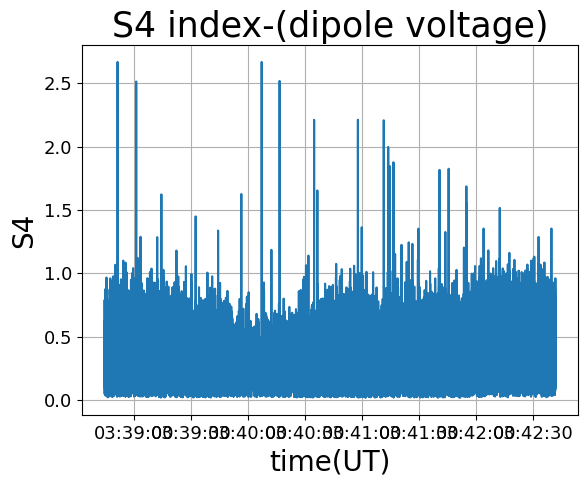

In [690]:
plt.plot(time_1[x],s4_new_let)
#plt.plot(time_1[x][0:10000],s4_new_let[0:10000])
#plt.xlim(left=pd.Timestamp('2015-04-01 03:40:00'),right=pd.Timestamp('2015-04-01 03:40:30') )
#plt.ylim(0,1.2)
plt.title('S4 index-(dipole voltage)',fontsize=25)
plt.grid(True)
#plt.xlim(4000,4200)
plt.xlabel('time(UT)',fontsize=20)
plt.ylabel('S4',fontsize=20)
plt.rcParams.update({'font.size': 13})

In [327]:
extract1[12]

array([12.75726852, 13.49298484, 12.44130323, 11.75064397, 12.09283315,
       13.00206261, 12.31804783, 11.50817063, 12.07968638, 12.62974474])

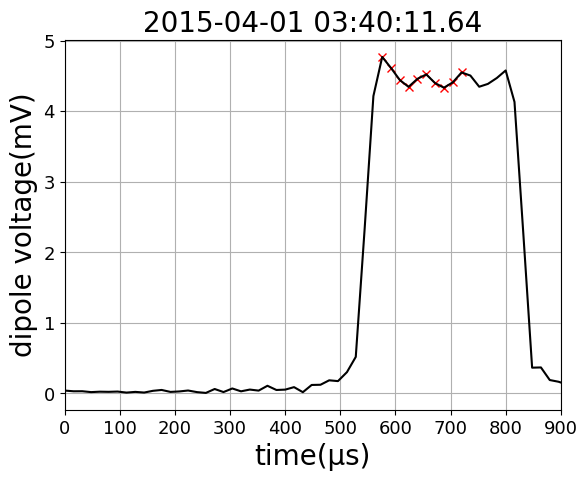

In [503]:
plt.plot(real_time[12],newa[12],'x',color='r')
plt.plot(real_time[12],n1[12],color='black')
plt.xlabel('time(μs)',fontsize=20)
plt.ylabel('dipole voltage(mV)',fontsize=20)
plt.title("2015-04-01 03:40:11.64",fontsize=20)
plt.rcParams.update({'font.size': 13})
plt.xlim(0,900)
#plt.ylim(0,1)
plt.grid(True)

In [ ]:
len(n1)

10796

In [ ]:
for i in range(len(n1)):
    fig, ax = plt.subplots()
    ax.plot(real_time[i],newa[i],'x',color='r')
    ax.plot(real_time[i],n1[i],color='black')
    ax.set_xlim(0,900)
    ax.set_title(f'{time_1[x[i]]}')
    fig.savefig(f'/volumes/subodh/newpulses/{time_1[x[i]]}.png')
    plt.close()

In [ ]:
#calculating SNR
def signal_power(signal_data):
    return np.sum(signal_data ** 2) / len(signal_data)
    
def noise_power(noise_data):
    noise = noise_data
    return np.sum(noise ** 2) / len(noise)

In [ ]:
#finding signal to noise ration(SNR)
SNR=[]
pos_signal_less_then_10=[]
pos_signal_greater_then_10=[]
for i in range(len(n1)):
          x1=(signal_power(extract2[i])-noise_power(n2[i])) / noise_power(n2[i]) #extract2 is datapoint from top of pulse and n2 is
          snr = 10*np.log10(x1)
          if snr<00:
                    pos_signal_less_then_10.append(i)
          if snr>=00:
                    SNR.append(snr)
                    pos_signal_greater_then_10.append(i)
SNR=np.array(SNR)
s_nan=np.isnan(SNR)
SNR[s_nan]=0
df_SNR=pd.DataFrame(SNR)
df_SNR.interpolate()
pos_signal_less_then_10=np.array(pos_signal_less_then_10)
pos_signal_greater_then_10=np.array(pos_signal_greater_then_10)

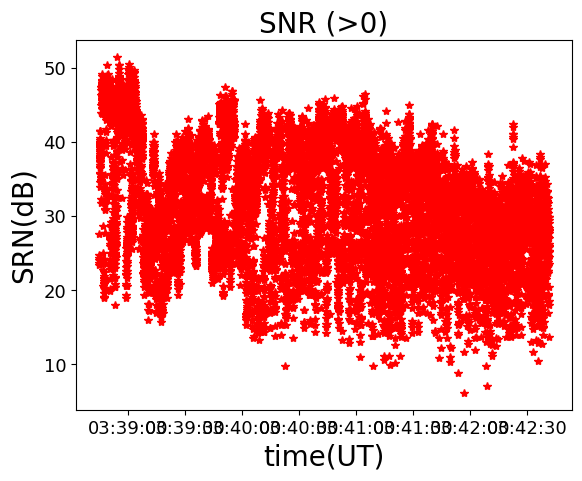

In [ ]:
plt.plot(time_1[x[pos_signal_greater_then_10]],df_SNR,'r*')
#plt.plot(time_1[x][0:10186],df_SNR[0:10186])
#plt.xlim(left=pd.Timestamp('2015-04-01 03:38:20'),right=pd.Timestamp('2015-04-01 03:39:40'))
plt.title("SNR (>0)",fontsize=20)
#plt.xlim(200,400)
plt.ylabel("SRN(dB)",fontsize=20)
plt.xlabel("time(UT)",fontsize=20)
plt.rcParams.update({'font.size': 11})